## Notebook imports and Packages

In [34]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff

%matplotlib inline

## Example 1 - A simple cost function

## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Generate data
x_1 = np.linspace(start = -3, stop = 3, num = 500)
print(x_1)

[-3.         -2.98797595 -2.9759519  -2.96392786 -2.95190381 -2.93987976
 -2.92785571 -2.91583166 -2.90380762 -2.89178357 -2.87975952 -2.86773547
 -2.85571142 -2.84368737 -2.83166333 -2.81963928 -2.80761523 -2.79559118
 -2.78356713 -2.77154309 -2.75951904 -2.74749499 -2.73547094 -2.72344689
 -2.71142285 -2.6993988  -2.68737475 -2.6753507  -2.66332665 -2.65130261
 -2.63927856 -2.62725451 -2.61523046 -2.60320641 -2.59118236 -2.57915832
 -2.56713427 -2.55511022 -2.54308617 -2.53106212 -2.51903808 -2.50701403
 -2.49498998 -2.48296593 -2.47094188 -2.45891784 -2.44689379 -2.43486974
 -2.42284569 -2.41082164 -2.3987976  -2.38677355 -2.3747495  -2.36272545
 -2.3507014  -2.33867735 -2.32665331 -2.31462926 -2.30260521 -2.29058116
 -2.27855711 -2.26653307 -2.25450902 -2.24248497 -2.23046092 -2.21843687
 -2.20641283 -2.19438878 -2.18236473 -2.17034068 -2.15831663 -2.14629259
 -2.13426854 -2.12224449 -2.11022044 -2.09819639 -2.08617234 -2.0741483
 -2.06212425 -2.0501002  -2.03807615 -2.0260521  -2.

In [4]:
type(x_1)

numpy.ndarray

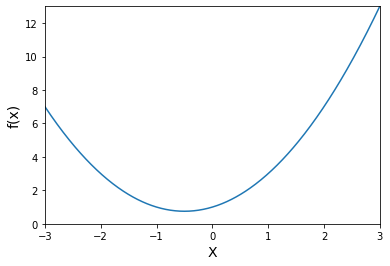

In [5]:
# Plot
plt.xlim([-3, 3])
plt.ylim([0, 13])
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives

In [6]:
def df(x):
    return 2 * x + 1

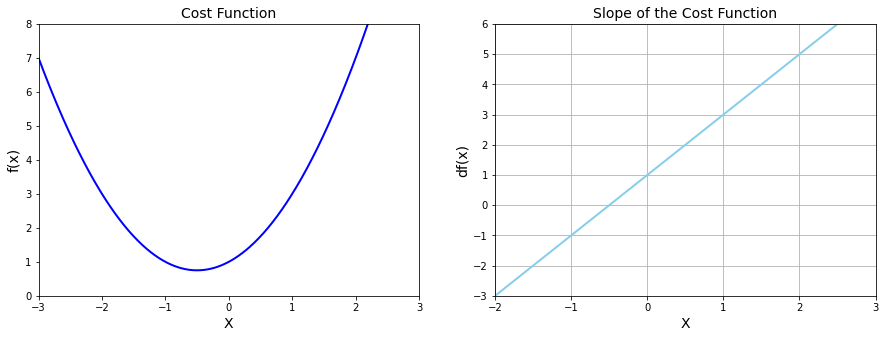

In [7]:
# Plot function and derivative side by side
plt.figure(figsize = [15, 5])

# 1 chart: Cost Function
plt.subplot(1, 2, 1) # (row, column, index)

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.title('Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.plot(x_1, f(x_1), color = 'blue', linewidth = 2)

# 2 chart: Derivative
plt.subplot(1, 2, 2)

plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.title('Slope of the Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(x)', fontsize = 14)
plt.grid()
plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 2)

plt.show()

## Python Loops and Gradient Descent (or slope on a cost function)

In [8]:
# Python for loop
for n in range(5):
    print(n)
    if n == 3:
        break

0
1
2
3


In [9]:
# Python while loop
n = 0
while n < 10:
    print('Counting...', n)
    n = (n + 1)
    if n == 5:
        break

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4


## Gradient Descent Algorithm (convex, where the cost is lower)

In [10]:
new_x = 3 # starting point
previous_x = 0 # temp value
step_multiplier = 0.1 # learning rate
precision = 0.000001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Number of times this loop rans: ', n)
        break
    
print('Local minimum occurs at: ', new_x)
print('Slope or df(x) value at this point is: ', df(new_x))
print('f(x) value or cost, at this point is: ', f(new_x))

Number of times this loop rans:  61
Local minimum occurs at:  -0.4999965672099885
Slope or df(x) value at this point is:  6.8655800230521535e-06
f(x) value or cost, at this point is:  0.750000000011784


In [11]:
print(6.86e-06)

6.86e-06


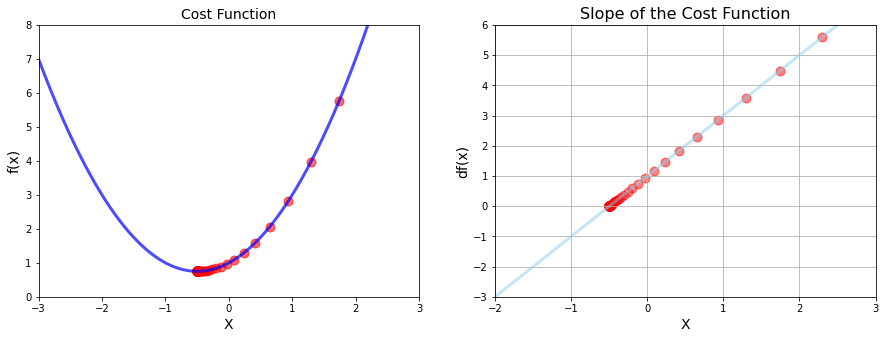

In [12]:
plt.figure(figsize = [15, 5])

# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.title('Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3, alpha = 0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 80, alpha = 0.6)

# 2 chart: derivative
plt.subplot(1, 2, 2)

plt.xlim([-2, 3])
plt.ylim([-3, 6])
plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(x)', fontsize = 14)
plt.grid()

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3, alpha = 0.5)
plt.scatter(x_list, slope_list, color = 'red', s = 80,  alpha = 0.5)

plt.show()

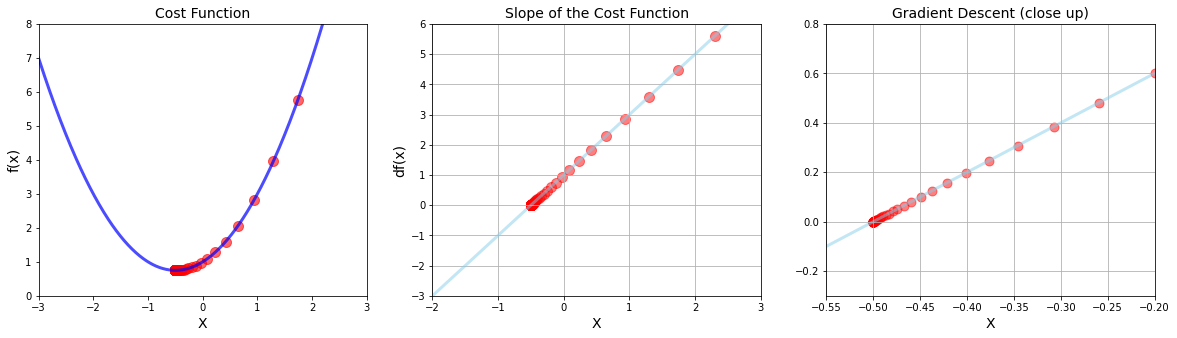

In [13]:
# Plot function and derivative

plt.figure(figsize = [20, 5])

# 1 chart: cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])
plt.title('Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3, alpha = 0.7)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.6)

# 2 chart: derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(x)', fontsize = 14)
plt.grid()
plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3, alpha = 0.5)
plt.scatter(x_list, slope_list, color = 'red', s = 100,  alpha = 0.5)

# 3 chart: derivative close up
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.grid()
plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3, alpha = 0.5)
plt.scatter(x_list, slope_list, color = 'red', s = 80,  alpha = 0.5)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess and Advanced Functions
## $g(x) = x^4 - 4x^2 + 5$

In [14]:
# Generate data

x_2 = np.linspace(start = -2, stop = 2, num = 1000)
print(x_2)

[-2.         -1.995996   -1.99199199 -1.98798799 -1.98398398 -1.97997998
 -1.97597598 -1.97197197 -1.96796797 -1.96396396 -1.95995996 -1.95595596
 -1.95195195 -1.94794795 -1.94394394 -1.93993994 -1.93593594 -1.93193193
 -1.92792793 -1.92392392 -1.91991992 -1.91591592 -1.91191191 -1.90790791
 -1.9039039  -1.8998999  -1.8958959  -1.89189189 -1.88788789 -1.88388388
 -1.87987988 -1.87587588 -1.87187187 -1.86786787 -1.86386386 -1.85985986
 -1.85585586 -1.85185185 -1.84784785 -1.84384384 -1.83983984 -1.83583584
 -1.83183183 -1.82782783 -1.82382382 -1.81981982 -1.81581582 -1.81181181
 -1.80780781 -1.8038038  -1.7997998  -1.7957958  -1.79179179 -1.78778779
 -1.78378378 -1.77977978 -1.77577578 -1.77177177 -1.76776777 -1.76376376
 -1.75975976 -1.75575576 -1.75175175 -1.74774775 -1.74374374 -1.73973974
 -1.73573574 -1.73173173 -1.72772773 -1.72372372 -1.71971972 -1.71571572
 -1.71171171 -1.70770771 -1.7037037  -1.6996997  -1.6956957  -1.69169169
 -1.68768769 -1.68368368 -1.67967968 -1.67567568 -1

In [15]:
# def g(x)
def g(x):
    return (x ** 4) - (4 * (x ** 2)) + 5

In [16]:
# the derivative of g(x)
def dg(x):
    return (4 * (x ** 3)) - (8 * x)

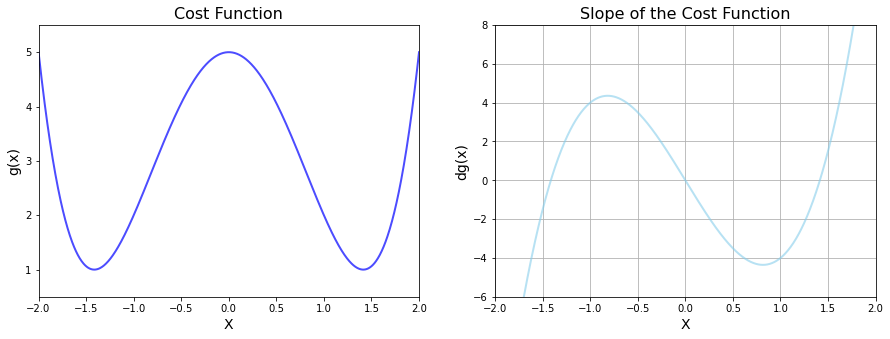

In [17]:
plt.figure(figsize = [15, 5])

# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 2, alpha = 0.7)

values = np.array(x_list)

# 2 chart: derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 2, alpha = 0.6)

plt.show()

## Gradient Descent as a Python Function

In [18]:
# Gradient Descent Algorithm (convex, where the cost is lower)

def gradient_descent(derivative_func, 
                     initial_guess, 
                     multiplier = 0.02, 
                     precision = 0.001,
                     max_iter = 300):
    
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [19]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  1.4122375085019094
Number of steps:  23


In [20]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, 
                                                 initial_guess = -0.5, 
                                                 multiplier = 0.01, 
                                                 precision = 0.0001)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4137636556157256
Number of steps:  56


In [21]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, 
                                                 initial_guess = -0.1)
print('Local min occurs at: ', local_min)
print('Number of steps: ', len(list_x))

Local min occurs at:  -1.4120887490901561
Number of steps:  34


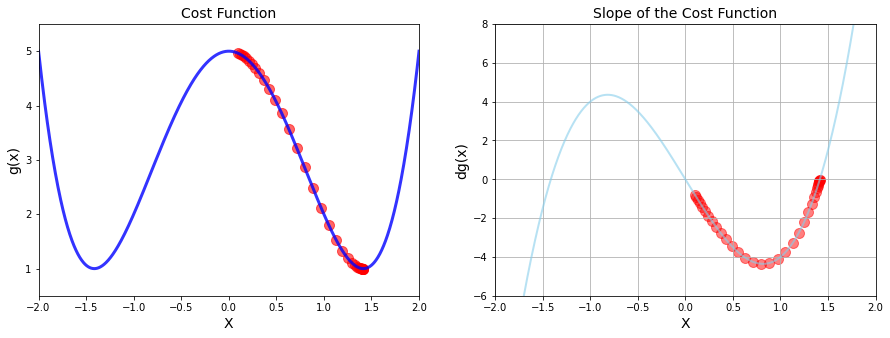

In [22]:
# Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)

plt.figure(figsize = [15, 5])

# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.title('Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color = 'red', s = 100, alpha = 0.6)

values = np.array(x_list)

# 2 chart: derivative
plt.subplot(1, 2, 2)

plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.title('Slope of the Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.grid()

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 2, alpha = 0.6)
plt.scatter(list_x, deriv_list, color = 'red', s = 100, alpha = 0.5)

plt.show()

## Example 3 - Divergence, Overflow and Pytrhon Tuples
## $h(x) = x^5 - 2x^4 + 2$

In [23]:
# Make data
x_3 = np.linspace(start = -2.5, stop = 2.5, num = 1000)
print(x_3)

[-2.5        -2.49499499 -2.48998999 -2.48498498 -2.47997998 -2.47497497
 -2.46996997 -2.46496496 -2.45995996 -2.45495495 -2.44994995 -2.44494494
 -2.43993994 -2.43493493 -2.42992993 -2.42492492 -2.41991992 -2.41491491
 -2.40990991 -2.4049049  -2.3998999  -2.39489489 -2.38988989 -2.38488488
 -2.37987988 -2.37487487 -2.36986987 -2.36486486 -2.35985986 -2.35485485
 -2.34984985 -2.34484484 -2.33983984 -2.33483483 -2.32982983 -2.32482482
 -2.31981982 -2.31481481 -2.30980981 -2.3048048  -2.2997998  -2.29479479
 -2.28978979 -2.28478478 -2.27977978 -2.27477477 -2.26976977 -2.26476476
 -2.25975976 -2.25475475 -2.24974975 -2.24474474 -2.23973974 -2.23473473
 -2.22972973 -2.22472472 -2.21971972 -2.21471471 -2.20970971 -2.2047047
 -2.1996997  -2.19469469 -2.18968969 -2.18468468 -2.17967968 -2.17467467
 -2.16966967 -2.16466466 -2.15965966 -2.15465465 -2.14964965 -2.14464464
 -2.13963964 -2.13463463 -2.12962963 -2.12462462 -2.11961962 -2.11461461
 -2.10960961 -2.1046046  -2.0995996  -2.09459459 -2.

In [24]:
def h(x):
    return x ** 5 - 2 * x ** 4 + 2

def dh(x):
    return 5 * x ** 4 - 8 * x ** 3

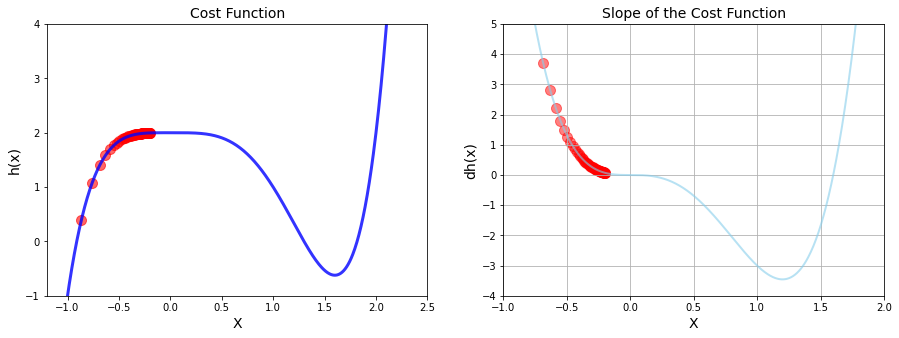

Local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of Steps:  72


In [25]:
# Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = -0.2, max_iter = 71)

plt.figure(figsize = [15, 5])

# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])
plt.title('Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('h(x)', fontsize = 14)

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color = 'red', s = 100, alpha = 0.6)

values = np.array(x_list)

# 2 chart: derivative
plt.subplot(1, 2, 2)

plt.xlim([-1, 2])
plt.ylim([-4, 5])
plt.title('Slope of the Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dh(x)', fontsize = 14)
plt.grid()

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 2, alpha = 0.6)
plt.scatter(list_x, deriv_list, color = 'red', s = 100, alpha = 0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of Steps: ', len(list_x))

In [26]:
import sys
# help(sys)
# sys.version
# type(h(local_min))

sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [27]:
# Creating a tuple - tuple paking
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

print('I love', breakfast[0])
print('My hotel has no a ' + str(unlucky_numbers[1]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014
# breakfast[0] = 'sausage'

tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

# sequence unpacking
main, side, greens = breakfast
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I love bacon
My hotel has no a 4th floor
(42,)
Main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


## Learning Rate

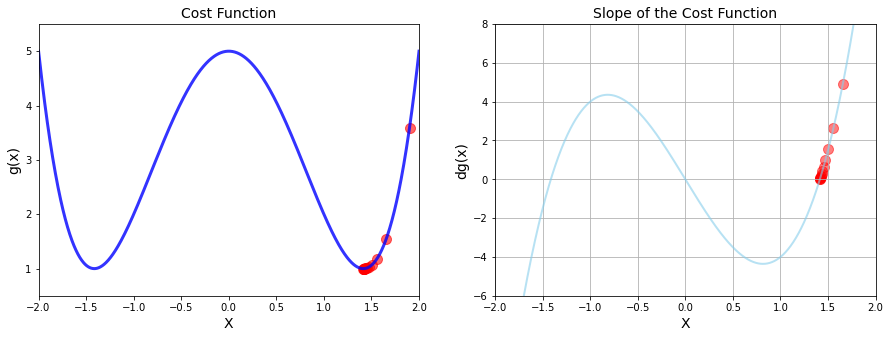

Number of steps is:  14


In [28]:
# Calling Gradient Descent Function
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 1.9, 
                                                 multiplier = 0.02, max_iter = 500)

plt.figure(figsize = [15, 5])

# 1 chart: cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])
plt.title('Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(x)', fontsize = 14)

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color = 'red', s = 100, alpha = 0.6)

values = np.array(x_list)

# 2 chart: derivative
plt.subplot(1, 2, 2)

plt.xlim([-2, 2])
plt.ylim([-6, 8])
plt.title('Slope of the Cost Function', fontsize = 14)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dg(x)', fontsize = 14)
plt.grid()

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 2, alpha = 0.6)
plt.scatter(list_x, deriv_list, color = 'red', s = 100, alpha = 0.5)

plt.show()

print('Number of steps is: ', len(list_x))

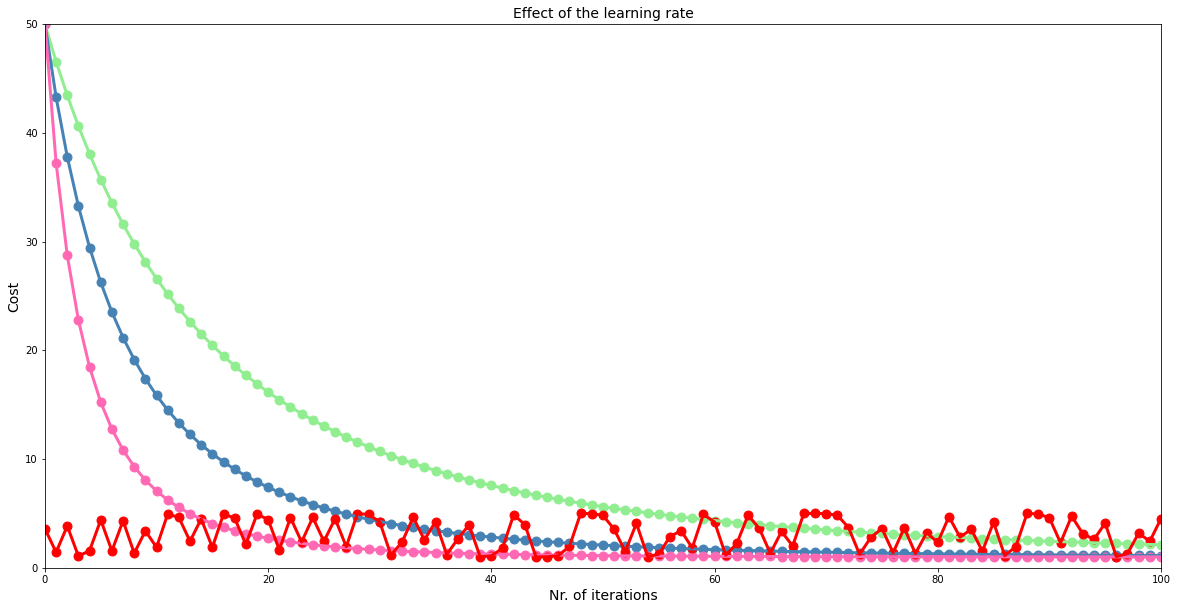

In [29]:
# Run Gradient Descent 3 times
n = 100

low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, 
                                                 multiplier = 0.0005, precision = 0.0001, max_iter = n)

mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, 
                                                 multiplier = 0.001, precision = 0.0001, max_iter = n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, 
                                                 multiplier = 0.002, precision = 0.0001, max_iter = n)
# Experiment
insane_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, 
                                                 multiplier = 0.25, precision = 0.0001, max_iter = n)

# Plotting reduction in cost for each iteration
plt.figure(figsize = [20, 10])

plt.xlim([0, n])
plt.ylim([0, 50])

plt.title('Effect of the learning rate', fontsize = 14)
plt.xlabel('Nr. of iterations', fontsize = 14)
plt.ylabel('Cost', fontsize = 14)

# Values for our charts
# Y axis
low_values = np.array(low_gamma[1])

# X axis
iteration_list = list(range(0, n + 1))

# plotting low learning rate
plt.plot(iteration_list, g(low_values), color = 'lightgreen', linewidth = 3)
plt.scatter(iteration_list, g(low_values), color = 'lightgreen', s = 80)

# plotting mid learning rate
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', linewidth = 3)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color = 'steelblue', s = 80)

# plotting high learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', linewidth = 3)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color = 'hotpink', s = 80)

# plotting insane learning rate
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color = 'red', linewidth = 3)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color = 'red', s = 80)

plt.show()

## Example 4 - Data Viz with 3D charts

## $f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$

## $f(x,y) = \frac{1}{r + 1}$ where $r$ is $3^{-x^2 - y^2}$

In [30]:
def f(x, y):
    r = 3 ** (-x ** 2 - y ** 2)
    return 1 / (r + 1)

In [31]:
# make data
x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of x array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of x array (200,)
Array after meshgrid:  (200, 200)


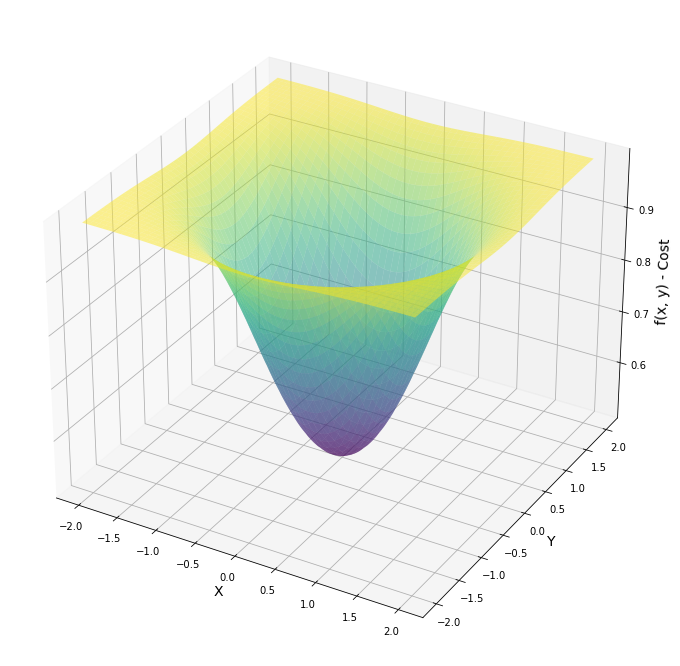

In [32]:
# generating 3D plot
fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('X', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.set_zlabel('f(x, y) - Cost', fontsize = 14)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.viridis, alpha = 0.5)

plt.show()

## Partial derivatives and Symbolic Computation

In [40]:
a, b = symbols('x, y')
f(a, b)

1/(3**(-x**2 - y**2) + 1)

In [41]:
diff(f(a,b), a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [42]:
f(a, b).evalf(subs = {a: 1.8, b: 1.0}) # Python Dictionary

0.990604794032582

In [44]:
# Value of partial derivative with respect to x:
diff(f(a,b), a).evalf(subs = {a: 1.8, b: 1.0})

0.0368089716197505

In [45]:
diff(f(a, b), b)

2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2

## Batch Gradient descent with Sympy

In [48]:
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs = {a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs = {a: params[0], b: params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000
